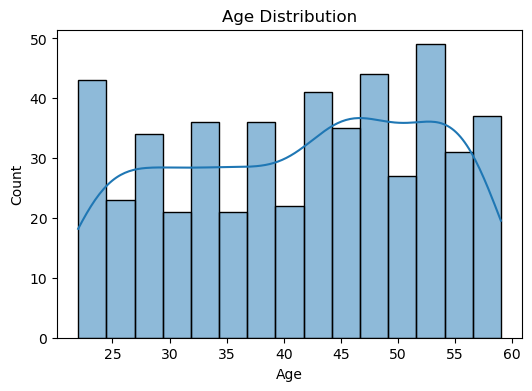

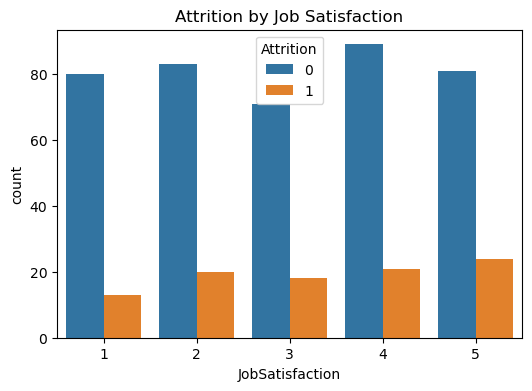

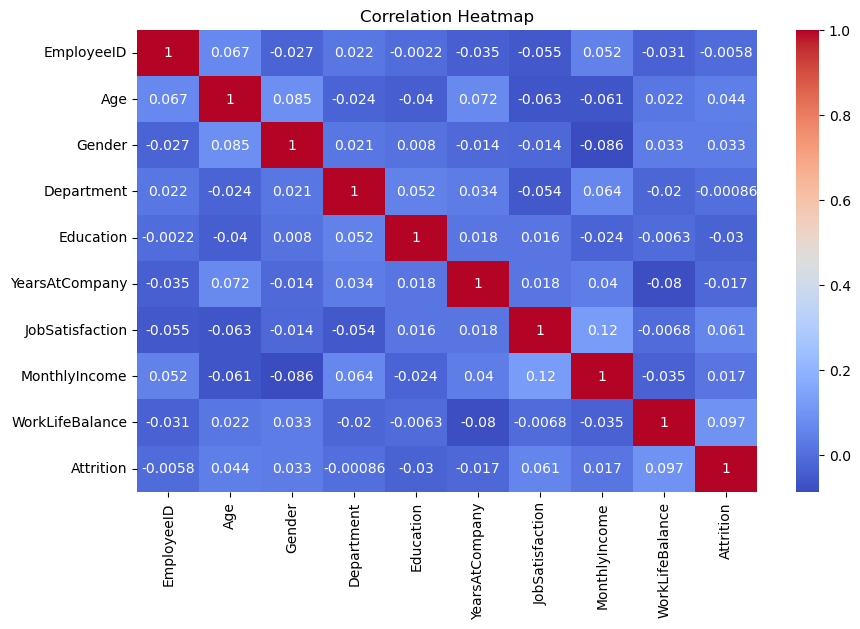

Accuracy: 0.81

Confusion Matrix:
 [[81  0]
 [19  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.90        81
           1       0.00      0.00      0.00        19

    accuracy                           0.81       100
   macro avg       0.41      0.50      0.45       100
weighted avg       0.66      0.81      0.72       100



c:\Users\WINDOWS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\WINDOWS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\WINDOWS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


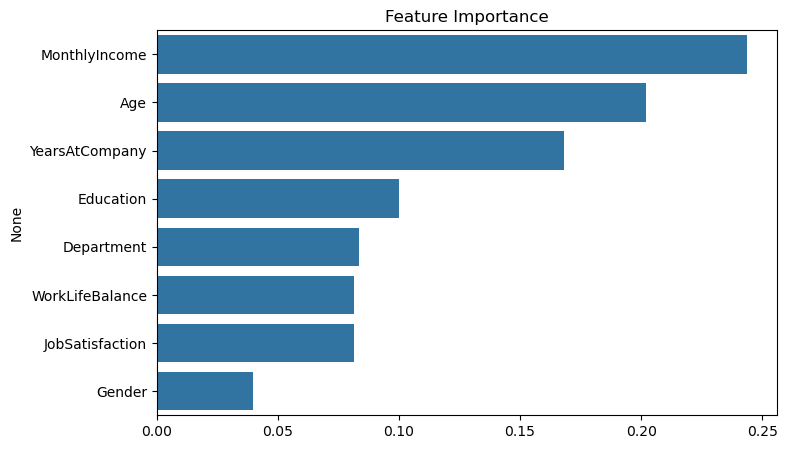

In [1]:
# ======= EMPLOYEE ATTRITION MINI PROJECT =======

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2: Create synthetic dataset
np.random.seed(42)
n = 500  # number of employees

data = {
    'EmployeeID': range(1, n+1),
    'Age': np.random.randint(22, 60, size=n),
    'Gender': np.random.choice(['Male', 'Female'], size=n),
    'Department': np.random.choice(['HR', 'IT', 'Sales', 'Marketing'], size=n),
    'Education': np.random.randint(1, 6, size=n),
    'YearsAtCompany': np.random.randint(0, 20, size=n),
    'JobSatisfaction': np.random.randint(1, 6, size=n),
    'MonthlyIncome': np.random.randint(30000, 150000, size=n),
    'WorkLifeBalance': np.random.randint(1, 5, size=n),
    'Attrition': np.random.choice(['Yes', 'No'], size=n, p=[0.2, 0.8])  # 20% attrition
}

df = pd.DataFrame(data)

# Step 3: Data Preparation
# Encode categorical variables
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])

le_dept = LabelEncoder()
df['Department'] = le_dept.fit_transform(df['Department'])

le_attrition = LabelEncoder()
df['Attrition'] = le_attrition.fit_transform(df['Attrition'])  # Yes=1, No=0

# Feature-target split
X = df.drop(['EmployeeID', 'Attrition'], axis=1)
y = df['Attrition']

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Data Visualization & EDA
# Distribution of Age
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=15, kde=True)
plt.title('Age Distribution')
plt.show()

# Attrition vs JobSatisfaction
plt.figure(figsize=(6,4))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
plt.title('Attrition by Job Satisfaction')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Step 5: Machine Learning Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 6: Feature Importance
feat_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=feat_importance.values, y=feat_importance.index)
plt.title('Feature Importance')
plt.show()
